# Density 

In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx

In [2]:
# Reading data from the shapefile 
merida = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
merida = merida[['CVEGEO', 'geometry']]
merida

,CVEGEO,geometry
0,3105000010027,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
1,3105000010031,"POLYGON ((-9965919.566 2390554.093, -9966007.0..."
2,3105000010120,"POLYGON ((-9973428.542 2392332.531, -9973426.9..."
3,3105000010154,"POLYGON ((-9986022.068 2384222.245, -9986019.5..."
4,3105000010169,"POLYGON ((-9975818.495 2391691.959, -9975809.3..."
...,...,...
588,3104100010846,"POLYGON ((-9969326.300 2389206.019, -9969288.7..."
589,3104100010850,"POLYGON ((-9969914.602 2387471.674, -9969980.1..."
590,3104100010865,"POLYGON ((-9969746.204 2387367.949, -9969861.7..."
591,310410001087A,"POLYGON ((-9973646.930 2381847.370, -9973651.3..."


In [3]:
population_data = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
population_data = population_data[['CVEGEO', 'POBTOT']]
population_data

,CVEGEO,POBTOT
0,3105000010027,21
1,3105000010031,253
2,3105000010120,1444
3,3105000010154,186
4,3105000010169,1580
...,...,...
588,3104100010846,2649
589,3104100010850,1089
590,3104100010865,1971
591,310410001087A,495


In [4]:
"""for index, row in merida['CVEGEO'].iteritems():
    if row in population_data['CVEGEO'].tolist():
        pass
    else:
        print('The district ', row , ' is NOT in the population_data list')"""

"for index, row in merida['CVEGEO'].iteritems():\n    if row in population_data['CVEGEO'].tolist():\n        pass\n    else:\n        print('The district ', row , ' is NOT in the population_data list')"

In [5]:
# Reprojecting to projected coordinate system 
merida.to_crs(epsg=6372, inplace = True)

In [6]:
merida

,CVEGEO,geometry
0,3105000010027,"POLYGON ((3774322.528 1063654.489, 3774329.825..."
1,3105000010031,"POLYGON ((3789663.282 1053825.754, 3789582.305..."
2,3105000010120,"POLYGON ((3782565.069 1054858.656, 3782566.594..."
3,3105000010154,"POLYGON ((3771541.322 1046380.527, 3771543.668..."
4,3105000010169,"POLYGON ((3780402.320 1054076.913, 3780410.928..."
...,...,...
588,3104100010846,"POLYGON ((3786615.383 1052309.314, 3786650.886..."
589,3104100010850,"POLYGON ((3786209.246 1050664.414, 3786149.535..."
590,3104100010865,"POLYGON ((3786373.584 1050582.435, 3786267.991..."
591,310410001087A,"POLYGON ((3783200.312 1045182.324, 3783202.185..."


In [7]:
# Create a new column and calculate the areas of the sectors
merida['area'] = merida.area/1000000

In [8]:
# Do an attributes join 
merida = merida.merge(population_data, on = 'CVEGEO')

In [9]:
# Create a population density column
merida['pop_den (people/sq. km)'] = merida['POBTOT']/merida['area']
merida['pop_den (people/sq. km)'].sum()

2802082.066847988

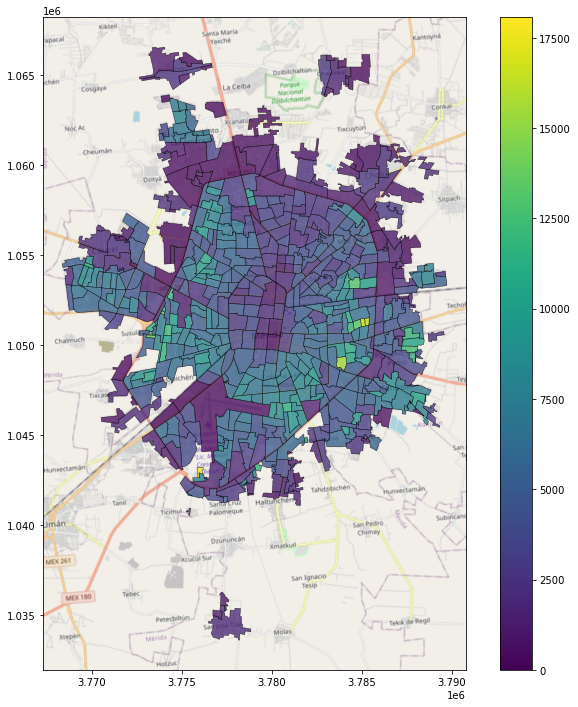

In [10]:
# Plotting 
f, ax = plt.subplots(1, figsize=(12, 12))
merida.plot(ax=ax, column = 'pop_den (people/sq. km)', cmap = 'viridis', legend = True, 
        edgecolor='black',
        linewidth=0.5, 
        alpha=0.75)
contextily.add_basemap(ax, 
                        crs=merida.crs,
                       url=ctx.tile_providers.OSM_A
                      )
plt.savefig('population_density_merida.jpg')